<a href="https://colab.research.google.com/github/am610/GW_ML/blob/main/GW_highres_RF_FREQUENCY_s15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### @Ayan Mitra
##### 2022

-2.0
6.0

 SNR = 99
Fitting 2 folds for each of 1 candidates, totalling 2 fits
GRID Search Complete

 
 Tuned parameters 

 RandomForestClassifier(bootstrap=False, max_depth=24, max_features=None,
                       min_samples_leaf=29, min_samples_split=16,
                       n_estimators=132)

 Accuracy = 0.333
Confusion Matrix =  [[1 6 1 1]
 [0 0 2 0]
 [0 2 4 2]
 [0 0 0 2]]

 Accuracy = 0.333
Confusion Matrix =  [[1 6 1 1]
 [0 0 2 0]
 [0 2 4 2]
 [0 0 0 2]]
----------------
Test Data 
----------------
              precision    recall  f1-score   support

          12       1.00      0.11      0.20         9
          15       0.00      0.00      0.00         2
          27       0.57      0.50      0.53         8
          40       0.40      1.00      0.57         2

    accuracy                           0.33        21
   macro avg       0.49      0.40      0.33        21
weighted avg       0.68      0.33      0.34        21

----------------
Train Data
----------------
   

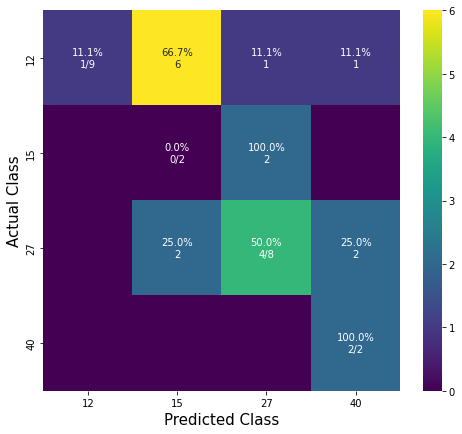

Time Taken: 3.123283386230469e-05


In [7]:
# -*- coding: utf-8 -*-
"""GW_highres_RF_FREQUENCY.py

Original file is located at
    https://colab.research.google.com/drive/1fT5xzQ-bGbRnbneligPPZXz7TlifJvsO

##### @Ayan Mitra
##### 2022
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import joblib
import io
import time
startTime_1 = time.time()
import logging
logging.getLogger('tensorflow').disabled = True
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
import sklearn.metrics as skm
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_val_predict, GridSearchCV 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA, IncrementalPCA
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm,Normalize
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import scipy.fftpack
#import hampel
import random
import sklearn
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import warnings
warnings.filterwarnings('ignore')
import sys
import seaborn as sns
from pylab import *
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as mpl
from scipy import interpolate
from numpy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.decomposition import PCA
from google.colab import files
from scipy.fft import fft, ifft, fftfreq

column = ['t','orig_w','filt_w','smt_w']


######
# Functions
######
def plot(i):
  plt.plot(Time.iloc[i],Signal.iloc[i],'.',label='%s'%i)
  plt.legend()
  plt.show()
  plt.close()
def noise(snr,input):
  target_snr_db = snr
  watts = input**2
  sig_avg_watts = np.mean(watts)
  sig_avg_db = 10 * np.log10(sig_avg_watts)
  noise_avg_db = sig_avg_db - target_snr_db
  noise_avg_watts = 10 ** (noise_avg_db / 10) # variance
  mean_noise = 0 #mu
  noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(watts))
  x_volts = input
  y_volts = x_volts + noise_volts
  return y_volts

def fourier_inverse(time, signal,filter_low,filter_high):
  N = len(time)
  T = (time[-1]-time[0])/N # Length / N
  yf = fft(signal)
  xf = fftfreq(N, T)[:N//2]
  yf[filter_low:filter_high] = 0
  iftgw = scipy.fft.ifft(yf)
  return(time,iftgw)

def fourier(time, signal,filter_low,filter_high):
  N = len(time)
  T = (time[-1]-time[0])/N # Length / N
  yf = fft(signal)
  xf = fftfreq(N, T)[:N//2]
  yf[filter_low:filter_high] = 0
  iftgw = scipy.fft.ifft(yf)
  #print(np.shape(signal),np.shape(time))
  return(time,yf)
  
#Confusion Matrix Plotter
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(12,12)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args:
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual Class'
    cm.columns.name = 'Predicted Class'
    fig, ax = plt.subplots(figsize=figsize)

    sns.heatmap(cm, annot=annot, fmt='', ax=ax,cmap="viridis")
    plt.ylabel('Actual Class',fontsize=15)
    plt.xlabel('Predicted Class',fontsize=15)
    plt.savefig("Confusion.pdf", bbox_inches='tight')
    plt.show()
    
    
def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print ('\n Accuracy = %.3f'%accuracy)
    print ('Confusion Matrix = ',confusion_matrix(y_test,y_pred))
    M = np.array(confusion_matrix(y_test,y_pred))
    return (accuracy,M)
######
######



np.random.seed(42)
a = pd.read_csv('drive/MyDrive/ML_dataS1.csv')
a = a.iloc[:, 1:]
a = a[~a.Label.str.startswith('s75')]
Label= a.iloc[:, -1]
# 
t=[];s=[];
Time = a.iloc[:,:10000]
Signal = a.iloc[:, 10000:-1]
a = a.iloc[:,:-1]
label0 = []
label1 = []
label2 = []
# 
for i in Label:
    label0.append(i[1:3])
    label1.append(i[3:6])
    label2.append(i[6:])
xlow=4250; xhigh=6251; #-2, +6
T = Time.iloc[:,xlow:xhigh]
S = Signal.iloc[:,xlow:xhigh]



# 
# 
TX = []
TY = []
print(round(np.min(T.iloc[0]),1))
print(round(np.max(T.iloc[0]),1))
xnew = pd.Series(np.linspace((round(np.min(T.iloc[0]),1)),(round(np.max(T.iloc[0]),1)),10000, endpoint=True))
for i in range(np.shape(a)[0]): # 46, 256
  tx = T.iloc[i]
  ty = S.iloc[i]
  f1 = interp1d(tx,ty, kind='cubic',fill_value="extrapolate")
  ynew = pd.Series(f1(xnew))
  SNR = 99
  ynew = pd.Series(noise(SNR,ynew)) # snr adding
  TX.append(xnew)
  TY.append(ynew)
#
print('\n SNR = %s'%SNR)
TS = pd.DataFrame(TY) # Trying GW wave signal
a = TS
X = a
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
X = X_scaled
y = np.array(label0).ravel()
y = (y[:]).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, shuffle = True, random_state=42)
nc = 350
pca_model = PCA(n_components=nc) #120
X_train_pca = pca_model.fit_transform(X_train)
X_test_pca = pca_model.transform(X_test)
X_train = X_train_pca
X_test = X_test_pca
# 
#
n_estimators = [int(x) for x in np.linspace(start = 100 ,
                                            stop = 300, num = 100)]
                                            # returns 10 numbers
# # Number of features to consider at every split
max_features = ['auto', 'sqrt','log2',None]
# # Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 250, num = 200)]
# 
max_depth.append(None)
# # Minimum number of samples required to split a node
min_samples_split =[int(x) for x in np.linspace(1, 100, num = 100)]
# 
# # Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 100)]
# 
# # Method of selecting samples for training each tree
bootstrap = [True, False]
oob_score = [True, False]
warm_start= [True, False]
# 
# # Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'oob_score': oob_score,
               'warm_start': warm_start}
# print(random_grid)
# 
# 
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 1, cv = 2, verbose=10, random_state=42, n_jobs = -1)
# # Fit the random search model
rf_random.fit(X_train, y_train)
# 
print('GRID Search Complete')
#
best_random = rf_random.best_estimator_
print('\n \n Tuned parameters \n\n',best_random)
evaluate(best_random, X_test, y_test)
mat = evaluate(best_random, X_test, y_test)[1]
mat.dump('Confusion.dat')
#
#filename = 'RF_GW_highres_model_FREQ.sav' # original is without -2 in name
#joblib.dump(best_random,  './'+filename )

y_pred       = best_random.predict(X_test)
y_pred_train = best_random.predict(X_train_pca)
report = pd.DataFrame(list(precision_recall_fscore_support(y_test, y_pred)), #y_train, y_pred_train
            index=['Precision', 'Recall', 'F1-score', 'Support']).T

# Now add the 'Avg/Total' row
report.loc['Avg/Total', :] = precision_recall_fscore_support(y_test, y_pred,
    average='weighted')
report.loc['Avg/Total', 'Support'] = report['Support'].sum()


print('----------------')
print('Test Data ')
print('----------------')
print(skm.classification_report( y_test , y_pred ))
print('----------------')
print('Train Data')
print('----------------')
print(skm.classification_report( y_train , y_pred_train ))
cm_analysis(y_test, y_pred, best_random.classes_, ymap=None, figsize=(8,7))
startTime_2 = time.time()
executionTime_2 = (time.time() - startTime_2)
print('Time Taken: ' + str(executionTime_2))
